# AMAZON PRIME DATA EXPLORATION

    

#### Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### importing dataset

In [2]:
df=pd.read_csv(r"C:\Users\satyaki basak\Downloads\archive (4)\amazon_prime_titles.csv")

#### Basic analysis

In [3]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,The Grand Seduction,Don McKellar,"Brendan Gleeson, Taylor Kitsch, Gordon Pinsent",Canada,"March 30, 2021",2014,NaN,113 min,"Comedy, Drama",A small fishing village must procure a local d...
1,s2,Movie,Take Care Good Night,Girish Joshi,"Mahesh Manjrekar, Abhay Mahajan, Sachin Khedekar",India,"March 30, 2021",2018,13+,110 min,"Drama, International",A Metro Family decides to fight a Cyber Crimin...
2,s3,Movie,Secrets of Deception,Josh Webber,"Tom Sizemore, Lorenzo Lamas, Robert LaSardo, R...",United States,"March 30, 2021",2017,NaN,74 min,"Action, Drama, Suspense",After a man discovers his wife is cheating on ...
3,s4,Movie,Pink: Staying True,Sonia Anderson,"Interviews with: Pink, Adele, Beyoncé, Britney...",United States,"March 30, 2021",2014,NaN,69 min,Documentary,"Pink breaks the mold once again, bringing her ..."
4,s5,Movie,Monster Maker,Giles Foster,"Harry Dean Stanton, Kieran O'Brien, George Cos...",United Kingdom,"March 30, 2021",1989,NaN,45 min,"Drama, Fantasy",Teenage Matt Banting wants to work with a famo...


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9668 entries, 0 to 9667
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       9668 non-null   object
 1   type          9668 non-null   object
 2   title         9668 non-null   object
 3   director      7586 non-null   object
 4   cast          8435 non-null   object
 5   country       672 non-null    object
 6   date_added    155 non-null    object
 7   release_year  9668 non-null   int64 
 8   rating        9331 non-null   object
 9   duration      9668 non-null   object
 10  listed_in     9668 non-null   object
 11  description   9668 non-null   object
dtypes: int64(1), object(11)
memory usage: 906.5+ KB


In [5]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2082
cast            1233
country         8996
date_added      9513
release_year       0
rating           337
duration           0
listed_in          0
description        0
dtype: int64

In [6]:
df.shape

(9668, 12)

#### Un-Nesting the Columns

In [7]:
#Putting comma separate details into a list
df['listed_in']=df['listed_in'].str.split(',')

In [8]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,The Grand Seduction,Don McKellar,"Brendan Gleeson, Taylor Kitsch, Gordon Pinsent",Canada,"March 30, 2021",2014,NaN,113 min,"[Comedy, Drama]",A small fishing village must procure a local d...
1,s2,Movie,Take Care Good Night,Girish Joshi,"Mahesh Manjrekar, Abhay Mahajan, Sachin Khedekar",India,"March 30, 2021",2018,13+,110 min,"[Drama, International]",A Metro Family decides to fight a Cyber Crimin...
2,s3,Movie,Secrets of Deception,Josh Webber,"Tom Sizemore, Lorenzo Lamas, Robert LaSardo, R...",United States,"March 30, 2021",2017,NaN,74 min,"[Action, Drama, Suspense]",After a man discovers his wife is cheating on ...
3,s4,Movie,Pink: Staying True,Sonia Anderson,"Interviews with: Pink, Adele, Beyoncé, Britney...",United States,"March 30, 2021",2014,NaN,69 min,[Documentary],"Pink breaks the mold once again, bringing her ..."
4,s5,Movie,Monster Maker,Giles Foster,"Harry Dean Stanton, Kieran O'Brien, George Cos...",United Kingdom,"March 30, 2021",1989,NaN,45 min,"[Drama, Fantasy]",Teenage Matt Banting wants to work with a famo...


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9668 entries, 0 to 9667
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       9668 non-null   object
 1   type          9668 non-null   object
 2   title         9668 non-null   object
 3   director      7586 non-null   object
 4   cast          8435 non-null   object
 5   country       672 non-null    object
 6   date_added    155 non-null    object
 7   release_year  9668 non-null   int64 
 8   rating        9331 non-null   object
 9   duration      9668 non-null   object
 10  listed_in     9668 non-null   object
 11  description   9668 non-null   object
dtypes: int64(1), object(11)
memory usage: 906.5+ KB


In [10]:
df_unnested=df.explode('listed_in').reset_index(drop=True)

In [11]:
df_unnested.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18309 entries, 0 to 18308
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       18309 non-null  object
 1   type          18309 non-null  object
 2   title         18309 non-null  object
 3   director      14681 non-null  object
 4   cast          16370 non-null  object
 5   country       1378 non-null   object
 6   date_added    320 non-null    object
 7   release_year  18309 non-null  int64 
 8   rating        17559 non-null  object
 9   duration      18309 non-null  object
 10  listed_in     18309 non-null  object
 11  description   18309 non-null  object
dtypes: int64(1), object(11)
memory usage: 1.7+ MB


In [12]:
df_unnested.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,The Grand Seduction,Don McKellar,"Brendan Gleeson, Taylor Kitsch, Gordon Pinsent",Canada,"March 30, 2021",2014,NaN,113 min,Comedy,A small fishing village must procure a local d...
1,s1,Movie,The Grand Seduction,Don McKellar,"Brendan Gleeson, Taylor Kitsch, Gordon Pinsent",Canada,"March 30, 2021",2014,NaN,113 min,Drama,A small fishing village must procure a local d...
2,s2,Movie,Take Care Good Night,Girish Joshi,"Mahesh Manjrekar, Abhay Mahajan, Sachin Khedekar",India,"March 30, 2021",2018,13+,110 min,Drama,A Metro Family decides to fight a Cyber Crimin...
3,s2,Movie,Take Care Good Night,Girish Joshi,"Mahesh Manjrekar, Abhay Mahajan, Sachin Khedekar",India,"March 30, 2021",2018,13+,110 min,International,A Metro Family decides to fight a Cyber Crimin...
4,s3,Movie,Secrets of Deception,Josh Webber,"Tom Sizemore, Lorenzo Lamas, Robert LaSardo, R...",United States,"March 30, 2021",2017,NaN,74 min,Action,After a man discovers his wife is cheating on ...


#### Handling null values

In [13]:
df_unnested.isnull().sum()

show_id             0
type                0
title               0
director         3628
cast             1939
country         16931
date_added      17989
release_year        0
rating            750
duration            0
listed_in           0
description         0
dtype: int64

In [14]:
df_unnested['director']=df_unnested['director'].fillna('Unknown director')
df_unnested['cast']=df_unnested['cast'].fillna('Unknown cast')
df_unnested['country']=df_unnested['country'].fillna('Unknown country')

In [15]:
df_unnested.isnull().sum()

show_id             0
type                0
title               0
director            0
cast                0
country             0
date_added      17989
release_year        0
rating            750
duration            0
listed_in           0
description         0
dtype: int64

In [16]:
df_unnested.dropna(inplace=True,axis=0,subset=['date_added','rating'])

In [17]:
df_unnested.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [18]:
df_unnested.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
2,s2,Movie,Take Care Good Night,Girish Joshi,"Mahesh Manjrekar, Abhay Mahajan, Sachin Khedekar",India,"March 30, 2021",2018,13+,110 min,Drama,A Metro Family decides to fight a Cyber Crimin...
3,s2,Movie,Take Care Good Night,Girish Joshi,"Mahesh Manjrekar, Abhay Mahajan, Sachin Khedekar",India,"March 30, 2021",2018,13+,110 min,International,A Metro Family decides to fight a Cyber Crimin...
1052,s554,TV Show,The Lucy Show,Unknown director,"Lucille Ball, Vivian Vance, Gale Gordon, Jimmy...",Unknown country,"March 30, 2021",1967,13+,3 Seasons,Comedy,"After her husband's death, Lucy Carmichael, an..."
2020,s1090,TV Show,Scaredy Squirrel,Unknown director,"Terry McGurrin, Jonathan Gould, Pat McKenna, L...",Unknown country,"March 30, 2021",2012,TV-G,4 Seasons,Animation,Based on a series of children's books written ...
2021,s1090,TV Show,Scaredy Squirrel,Unknown director,"Terry McGurrin, Jonathan Gould, Pat McKenna, L...",Unknown country,"March 30, 2021",2012,TV-G,4 Seasons,Kids,Based on a series of children's books written ...


In [19]:
#Unnesting the cast column
df_unnested['cast']=df_unnested['cast'].str.split(',')
df_un=df_unnested.explode('cast').reset_index(drop=True)

In [20]:
df_un.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s2,Movie,Take Care Good Night,Girish Joshi,Mahesh Manjrekar,India,"March 30, 2021",2018,13+,110 min,Drama,A Metro Family decides to fight a Cyber Crimin...
1,s2,Movie,Take Care Good Night,Girish Joshi,Abhay Mahajan,India,"March 30, 2021",2018,13+,110 min,Drama,A Metro Family decides to fight a Cyber Crimin...
2,s2,Movie,Take Care Good Night,Girish Joshi,Sachin Khedekar,India,"March 30, 2021",2018,13+,110 min,Drama,A Metro Family decides to fight a Cyber Crimin...
3,s2,Movie,Take Care Good Night,Girish Joshi,Mahesh Manjrekar,India,"March 30, 2021",2018,13+,110 min,International,A Metro Family decides to fight a Cyber Crimin...
4,s2,Movie,Take Care Good Night,Girish Joshi,Abhay Mahajan,India,"March 30, 2021",2018,13+,110 min,International,A Metro Family decides to fight a Cyber Crimin...


In [21]:
df_unnested.shape

(293, 12)

In [22]:
df_un.shape

(1295, 12)

#### Treatment on the original dataframe

In [23]:
#Deleting show id (using original dataframe)
df.drop(columns=['show_id'])

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,Movie,The Grand Seduction,Don McKellar,"Brendan Gleeson, Taylor Kitsch, Gordon Pinsent",Canada,"March 30, 2021",2014,NaN,113 min,"[Comedy, Drama]",A small fishing village must procure a local d...
1,Movie,Take Care Good Night,Girish Joshi,"Mahesh Manjrekar, Abhay Mahajan, Sachin Khedekar",India,"March 30, 2021",2018,13+,110 min,"[Drama, International]",A Metro Family decides to fight a Cyber Crimin...
2,Movie,Secrets of Deception,Josh Webber,"Tom Sizemore, Lorenzo Lamas, Robert LaSardo, R...",United States,"March 30, 2021",2017,NaN,74 min,"[Action, Drama, Suspense]",After a man discovers his wife is cheating on ...
3,Movie,Pink: Staying True,Sonia Anderson,"Interviews with: Pink, Adele, Beyoncé, Britney...",United States,"March 30, 2021",2014,NaN,69 min,[Documentary],"Pink breaks the mold once again, bringing her ..."
4,Movie,Monster Maker,Giles Foster,"Harry Dean Stanton, Kieran O'Brien, George Cos...",United Kingdom,"March 30, 2021",1989,NaN,45 min,"[Drama, Fantasy]",Teenage Matt Banting wants to work with a famo...
...,...,...,...,...,...,...,...,...,...,...,...
9663,Movie,Pride Of The Bowery,Joseph H. Lewis,"Leo Gorcey, Bobby Jordan",NaN,NaN,1940,7+,60 min,[Comedy],New York City street principles get an East Si...
9664,TV Show,Planet Patrol,NaN,"DICK VOSBURGH, RONNIE STEVENS, LIBBY MORRIS, M...",NaN,NaN,2018,13+,4 Seasons,[TV Shows],"This is Earth, 2100AD - and these are the adve..."
9665,Movie,Outpost,Steve Barker,"Ray Stevenson, Julian Wadham, Richard Brake, M...",NaN,NaN,2008,R,90 min,[Action],"In war-torn Eastern Europe, a world-weary grou..."
9666,TV Show,Maradona: Blessed Dream,NaN,"Esteban Recagno, Ezequiel Stremiz, Luciano Vit...",NaN,NaN,2021,TV-MA,1 Season,"[Drama, Sports]","The series tells the story of Diego Maradona, ..."


In [24]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2082
cast            1233
country         8996
date_added      9513
release_year       0
rating           337
duration           0
listed_in          0
description        0
dtype: int64

In [25]:
df['director']=df['director'].fillna('unknown director')
df['country']=df['country'].fillna('unknown country')
df['rating']=df['rating'].fillna('unknown rating')
df['date_added']=df['date_added'].fillna('unknown date')



In [26]:
df.shape

(9668, 12)

In [27]:
df.isnull().sum()

show_id            0
type               0
title              0
director           0
cast            1233
country            0
date_added         0
release_year       0
rating             0
duration           0
listed_in          0
description        0
dtype: int64

In [28]:
df.drop('cast',inplace=True,axis=1)

### Data Exploration

In [29]:
df['country'].value_counts()

unknown country                          8996
United States                             253
India                                     229
United Kingdom                             28
Canada                                     16
                                         ... 
United States, Germany, Brazil, Italy       1
South Africa                                1
Australia, United States, Germany           1
Germany, Austria, United States             1
Italy, Spain                                1
Name: country, Length: 87, dtype: int64

In [30]:
df['rating'].value_counts()

13+               2117
16+               1547
ALL               1268
18+               1243
R                 1010
PG-13              393
7+                 385
unknown rating     337
PG                 253
NR                 223
TV-14              208
TV-PG              169
TV-NR              105
G                   93
TV-G                81
TV-MA               77
TV-Y                74
TV-Y7               39
UNRATED             33
NC-17                3
AGES_18_             3
NOT_RATE             3
AGES_16_             2
16                   1
ALL_AGES             1
Name: rating, dtype: int64

In [31]:
df['release_year'].value_counts()

2021    1442
2020     962
2019     929
2018     623
2017     562
        ... 
1922       2
1926       2
1924       1
1923       1
1927       1
Name: release_year, Length: 100, dtype: int64

In [32]:
df['type'].value_counts()

Movie      7814
TV Show    1854
Name: type, dtype: int64

In [33]:
df['country'].value_counts().iloc[:10]

unknown country                  8996
United States                     253
India                             229
United Kingdom                     28
Canada                             16
United Kingdom, United States      12
Spain                               8
Italy                               8
Canada, United States               7
United States, United Kingdom       6
Name: country, dtype: int64

In [34]:
#filtering out unknown directors
#top 10 directors
df[df['director']!='unknown director']['director'].value_counts().iloc[:10]

Mark Knight              113
Cannis Holder             61
Moonbug Entertainment     37
Jay Chapman               34
Arthur van Merwijk        30
Manny Rodriguez           22
John English              20
1                         16
Brian Volk-Weiss          15
Baeble Music              14
Name: director, dtype: int64

In [35]:
#top 10 countries
df[df['country']!='unknown country']['country'].value_counts().iloc[:10]

United States                    253
India                            229
United Kingdom                    28
Canada                            16
United Kingdom, United States     12
Spain                              8
Italy                              8
Canada, United States              7
United States, United Kingdom      6
India, United States               5
Name: country, dtype: int64

In [36]:
df_cleaned=df[df['country']!='unknown country']

In [37]:
top_10_countries=df[df['country']!='unknown country']['country'].value_counts().iloc[:10]

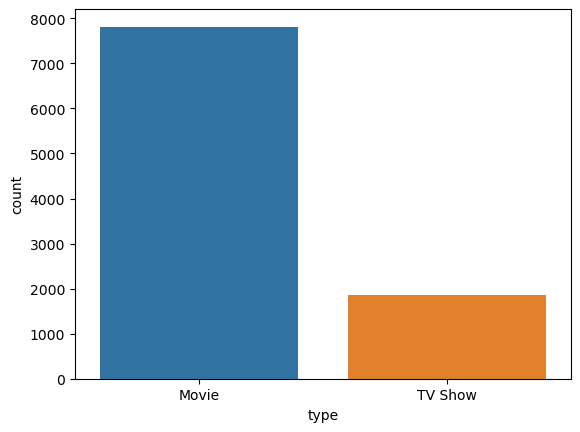

In [38]:
sns.countplot(data=df,x='type')
plt.show()

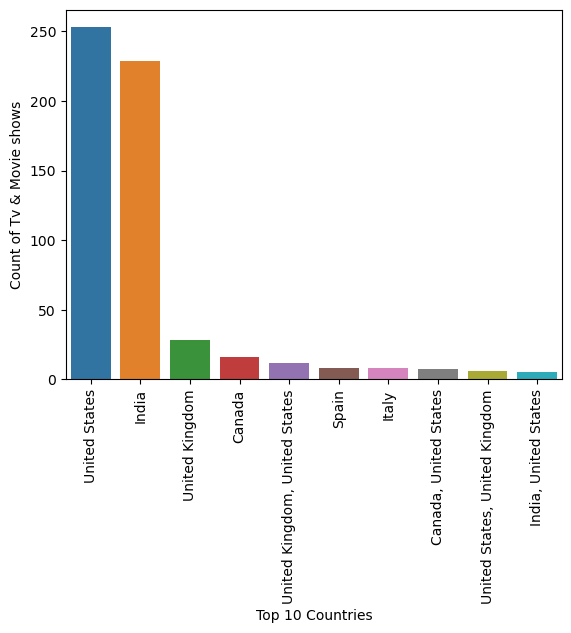

<Figure size 1000x600 with 0 Axes>

In [39]:
sns.countplot(data=df[df['country'].isin(top_10_countries.index)],x='country',order=top_10_countries.index)
plt.xticks(rotation=90)
plt.xlabel('Top 10 Countries')
plt.ylabel('Count of Tv & Movie shows')
plt.figure(figsize=(10,6))
plt.show()

#### Insight:
*Top 3 countries where most of the movies and TV shows are produced are USA,India,UK.
*The gap between the number of movies,TV shows produced in USA and India is very low. Whereas 3rd highest number is too low.

In [40]:
top_5_rating=df['rating'].value_counts().iloc[:5]

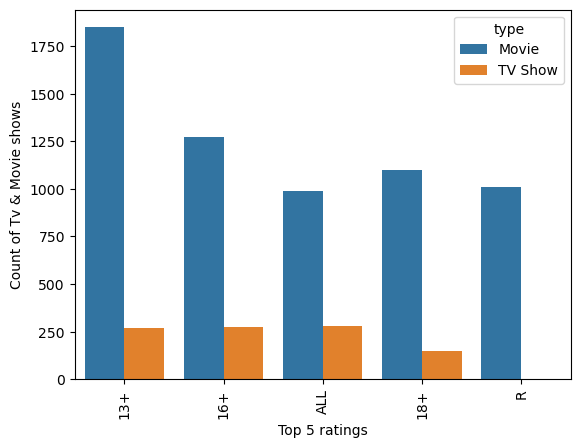

<Figure size 1000x600 with 0 Axes>

In [41]:
sns.countplot(data=df[df['rating'].isin(top_5_rating.index)],x='rating',order=top_5_rating.index,hue='type')
plt.xticks(rotation=90)
plt.xlabel('Top 5 ratings')
plt.ylabel('Count of Tv & Movie shows')
plt.figure(figsize=(10,6))
plt.show()

In [42]:
top_10_directors=df[df['director']!='unknown director']['director'].value_counts().sort_values(ascending=False).iloc[:10]

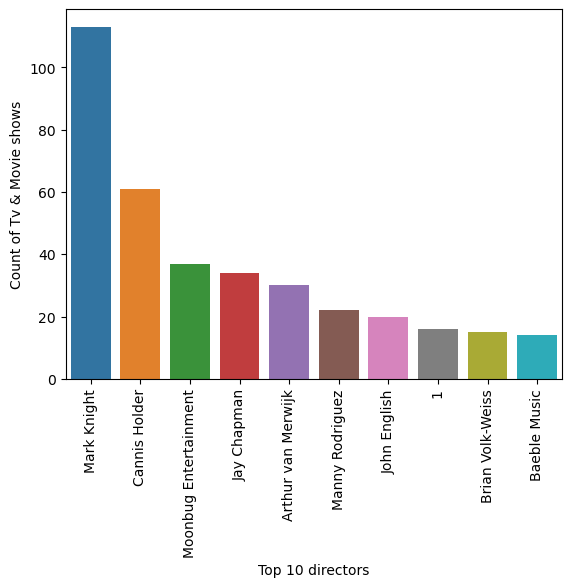

In [43]:
sns.countplot(data=df[df['director'].isin(top_10_directors.index)],x='director',order=top_10_directors.index)
plt.xticks(rotation=90)
plt.xlabel('Top 10 directors')
plt.ylabel('Count of Tv & Movie shows')
plt.show()

In [44]:
top_10_year=df['release_year'].value_counts().sort_values(ascending=False).iloc[:10]

In [45]:
top_10_year

2021    1442
2020     962
2019     929
2018     623
2017     562
2016     521
2014     391
2015     378
2013     289
2011     252
Name: release_year, dtype: int64

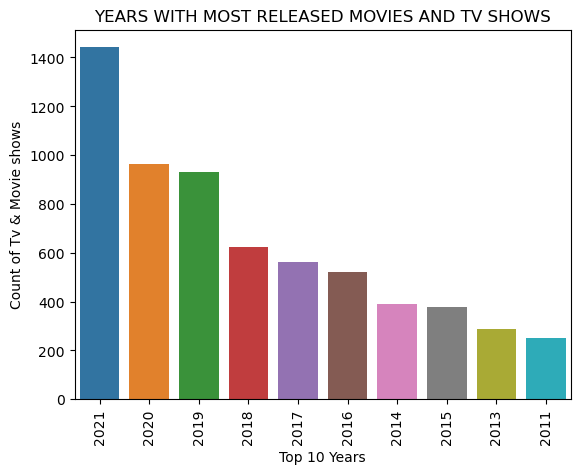

In [46]:
sns.countplot(data=df[df['release_year'].isin(top_10_year.index)],x='release_year',order=top_10_year.index)
plt.xticks(rotation=90)
plt.xlabel('Top 10 Years')
plt.ylabel('Count of Tv & Movie shows')
plt.title('YEARS WITH MOST RELEASED MOVIES AND TV SHOWS')
plt.show()

#### Insights:
Most of the movies and TV shows in Amazon prime has released in the years between 2019-2021 with a big jump in 2021

#### Comparison  TV Shows vs Movies

In [47]:
top_10_country_movies=df_cleaned[df_cleaned['type']=='Movie'].groupby('country').aggregate({'title':'count'}).reset_index().sort_values(by='title',ascending=False).rename(columns={'title':'Count of Movies'}).iloc[:10]
top_10_country_movies

,country,Count of Movies
24,India,213
54,United States,194
46,United Kingdom,24
8,Canada,16
52,"United Kingdom, United States",9
32,Italy,6
76,"United States, United Kingdom",6
10,"Canada, United States",5
28,"India, United States",5
1,Australia,4


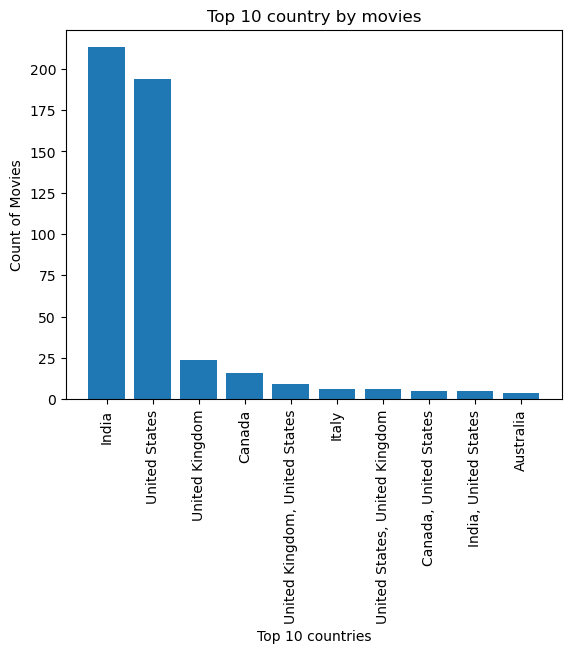

In [48]:
plt.bar(x=top_10_country_movies['country'],height=top_10_country_movies['Count of Movies'])
plt.xticks(rotation=90)
plt.xlabel('Top 10 countries')
plt.ylabel('Count of Movies')
plt.title('Top 10 country by movies')
plt.show()

#### Insight:
India and USA are primary countries producing highest quantities of amazon prime movies.

In [49]:
top_10_country_Tv_show=df_cleaned[df_cleaned['type']=='TV Show'].groupby('country')['title'].count().sort_values(ascending=False).iloc[:10]
top_10_country_Tv_show

country
United States                    59
India                            16
Spain                             5
United Kingdom                    4
United Kingdom, United States     3
Canada, United States             2
Germany                           2
Italy                             2
Japan                             2
Mexico                            2
Name: title, dtype: int64

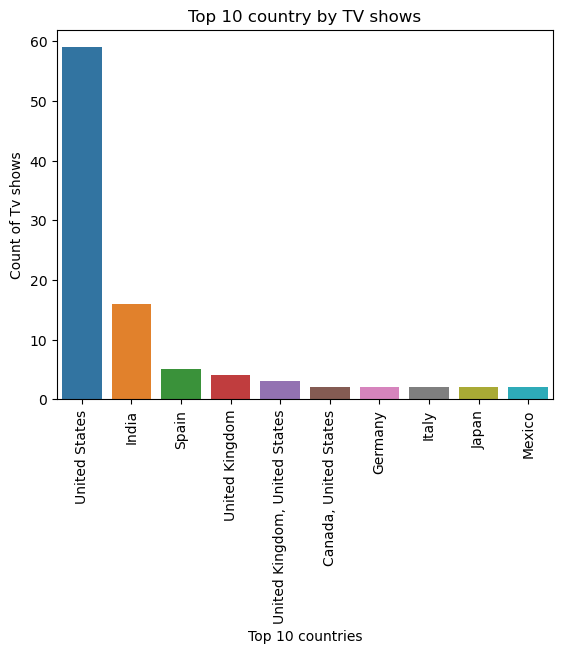

In [50]:
sns.barplot(x=top_10_country_Tv_show.index,y=top_10_country_Tv_show.values,order=top_10_country_Tv_show.index)
plt.xticks(rotation=90)
plt.xlabel('Top 10 countries')
plt.ylabel('Count of Tv shows')
plt.title('Top 10 country by TV shows')
plt.show()


#### Insight
USA produces highest quantities of TV shows each year

#### TOP 10 COUNTRIES: Movies vs TV Shows

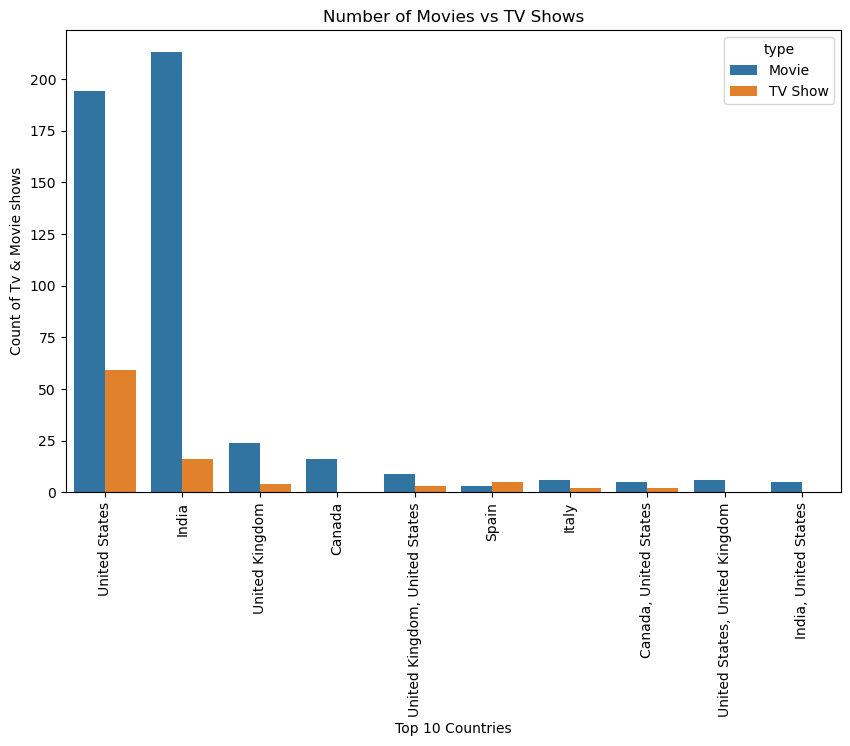

In [51]:
plt.figure(figsize=(10,6))
sns.countplot(data=df[df['country'].isin(top_10_countries.index)],x='country',order=top_10_countries.index,hue='type')
plt.xticks(rotation=90)
plt.xlabel('Top 10 Countries')
plt.ylabel('Count of Tv & Movie shows')
plt.title('Number of Movies vs TV Shows')
plt.show()

#### Best week to launch a TV show?

In [52]:
df

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,The Grand Seduction,Don McKellar,Canada,"March 30, 2021",2014,unknown rating,113 min,"[Comedy, Drama]",A small fishing village must procure a local d...
1,s2,Movie,Take Care Good Night,Girish Joshi,India,"March 30, 2021",2018,13+,110 min,"[Drama, International]",A Metro Family decides to fight a Cyber Crimin...
2,s3,Movie,Secrets of Deception,Josh Webber,United States,"March 30, 2021",2017,unknown rating,74 min,"[Action, Drama, Suspense]",After a man discovers his wife is cheating on ...
3,s4,Movie,Pink: Staying True,Sonia Anderson,United States,"March 30, 2021",2014,unknown rating,69 min,[Documentary],"Pink breaks the mold once again, bringing her ..."
4,s5,Movie,Monster Maker,Giles Foster,United Kingdom,"March 30, 2021",1989,unknown rating,45 min,"[Drama, Fantasy]",Teenage Matt Banting wants to work with a famo...
...,...,...,...,...,...,...,...,...,...,...,...
9663,s9664,Movie,Pride Of The Bowery,Joseph H. Lewis,unknown country,unknown date,1940,7+,60 min,[Comedy],New York City street principles get an East Si...
9664,s9665,TV Show,Planet Patrol,unknown director,unknown country,unknown date,2018,13+,4 Seasons,[TV Shows],"This is Earth, 2100AD - and these are the adve..."
9665,s9666,Movie,Outpost,Steve Barker,unknown country,unknown date,2008,R,90 min,[Action],"In war-torn Eastern Europe, a world-weary grou..."
9666,s9667,TV Show,Maradona: Blessed Dream,unknown director,unknown country,unknown date,2021,TV-MA,1 Season,"[Drama, Sports]","The series tells the story of Diego Maradona, ..."


In [53]:
df['date_added']=pd.to_datetime(df['date_added'], errors='coerce')

In [54]:
df['week_added'] = df['date_added'].dt.isocalendar().week

In [55]:
df.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in,description,week_added
0,s1,Movie,The Grand Seduction,Don McKellar,Canada,2021-03-30,2014,unknown rating,113 min,"[Comedy, Drama]",A small fishing village must procure a local d...,13
1,s2,Movie,Take Care Good Night,Girish Joshi,India,2021-03-30,2018,13+,110 min,"[Drama, International]",A Metro Family decides to fight a Cyber Crimin...,13
2,s3,Movie,Secrets of Deception,Josh Webber,United States,2021-03-30,2017,unknown rating,74 min,"[Action, Drama, Suspense]",After a man discovers his wife is cheating on ...,13
3,s4,Movie,Pink: Staying True,Sonia Anderson,United States,2021-03-30,2014,unknown rating,69 min,[Documentary],"Pink breaks the mold once again, bringing her ...",13
4,s5,Movie,Monster Maker,Giles Foster,United Kingdom,2021-03-30,1989,unknown rating,45 min,"[Drama, Fantasy]",Teenage Matt Banting wants to work with a famo...,13


In [56]:
top_10_weeks_TV_show=df[df['type']=='TV Show'].groupby('week_added')['title'].count().sort_values(ascending=False).iloc[:10]
print(top_10_weeks_TV_show)

week_added
40    11
25    11
39    11
37    10
38     9
34     9
13     7
28     6
33     6
36     5
Name: title, dtype: int64


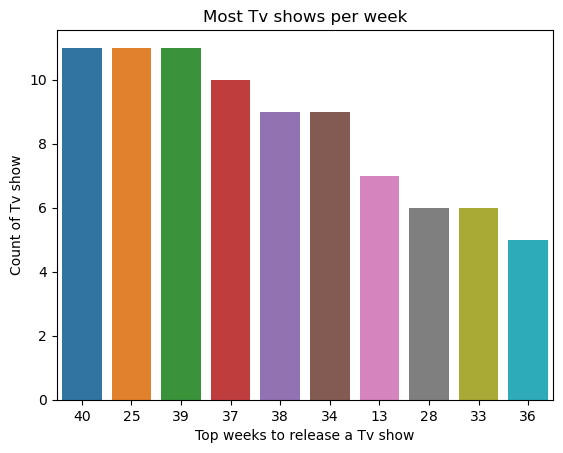

In [57]:
sns.barplot(x=top_10_weeks_TV_show.index,y=top_10_weeks_TV_show.values,order=top_10_weeks_TV_show.index)
plt.xlabel('Top weeks to release a Tv show')
plt.ylabel('Count of Tv show')
plt.title('Most Tv shows per week')
plt.show()

#### Insights:
TV shows are notably added in weeks around late June,late/early/mid october,mid september

#### Best week to launch a Movie?

In [58]:
top_10_weeks_Movies=df[df['type']=='Movie'].groupby('week_added')['title'].count().sort_values(ascending=False).iloc[:10]
print(top_10_weeks_Movies)

week_added
13    11
14     1
15     1
16     1
17     1
22     1
Name: title, dtype: int64


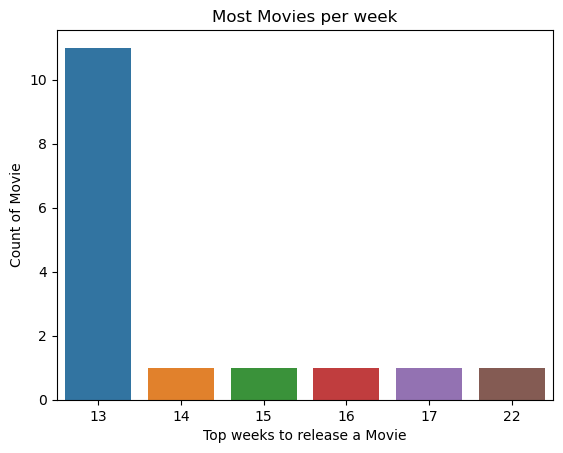

In [59]:
sns.barplot(x=top_10_weeks_Movies.index,y=top_10_weeks_Movies.values,order=top_10_weeks_Movies.index)
plt.xlabel('Top weeks to release a Movie')
plt.ylabel('Count of Movie')
plt.title('Most Movies per week')
plt.show()

#### Insights:

#### Best month to launch a TV Show?

In [61]:
df['month_added']=df['date_added'].dt.month_name()
df.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in,description,week_added,month_added
0,s1,Movie,The Grand Seduction,Don McKellar,Canada,2021-03-30,2014,unknown rating,113 min,"[Comedy, Drama]",A small fishing village must procure a local d...,13,March
1,s2,Movie,Take Care Good Night,Girish Joshi,India,2021-03-30,2018,13+,110 min,"[Drama, International]",A Metro Family decides to fight a Cyber Crimin...,13,March
2,s3,Movie,Secrets of Deception,Josh Webber,United States,2021-03-30,2017,unknown rating,74 min,"[Action, Drama, Suspense]",After a man discovers his wife is cheating on ...,13,March
3,s4,Movie,Pink: Staying True,Sonia Anderson,United States,2021-03-30,2014,unknown rating,69 min,[Documentary],"Pink breaks the mold once again, bringing her ...",13,March
4,s5,Movie,Monster Maker,Giles Foster,United Kingdom,2021-03-30,1989,unknown rating,45 min,"[Drama, Fantasy]",Teenage Matt Banting wants to work with a famo...,13,March


In [62]:
top_5_months_Tv_shows=df[df['type']=='TV Show'].groupby('month_added')['title'].count().sort_values(ascending=False).iloc[:5]
print(top_5_months_Tv_shows)

month_added
September    29
June         25
August       24
October      19
July         16
Name: title, dtype: int64


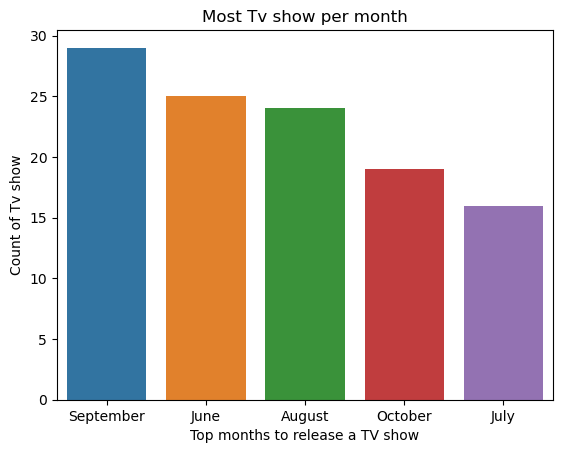

In [63]:
sns.barplot(x=top_5_months_Tv_shows.index,y=top_5_months_Tv_shows.values,order=top_5_months_Tv_shows.index)
plt.xlabel('Top months to release a TV show')
plt.ylabel('Count of Tv show')
plt.title('Most Tv show per month')
plt.show()

#### Insights:

#### Best month to launch a movie

In [64]:
top_5_months_movies=df[df['type']=='Movie'].groupby('month_added')['title'].count().sort_values(ascending=False).iloc[:5]
print(top_5_months_movies)

month_added
March    9
April    5
June     1
May      1
Name: title, dtype: int64


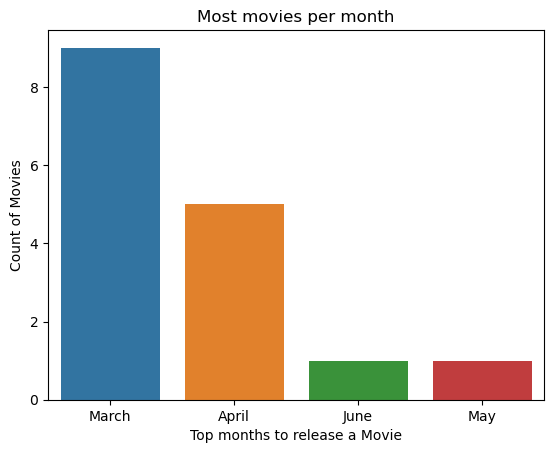

In [65]:
sns.barplot(x=top_5_months_movies.index,y=top_5_months_movies.values,order=top_5_months_movies.index)
plt.xlabel('Top months to release a Movie')
plt.ylabel('Count of Movies')
plt.title('Most movies per month')
plt.show()

#### Insights:

#### Analysis of actors/directors of different types of shows/movies

#### Top 10 actors who have appeared in most movies

In [67]:
df_un['cast']=df_un['cast'].str.strip()

In [68]:
top_10_actor_movie=df_un[(df_un['type']=='Movie')&(df_un['cast']!='unknown cast')].groupby('cast')['title'].count().sort_values(ascending=False).iloc[:10]
top_10_actor_movie

cast
Abhay Mahajan       2
Mahesh Manjrekar    2
Sachin Khedekar     2
Name: title, dtype: int64

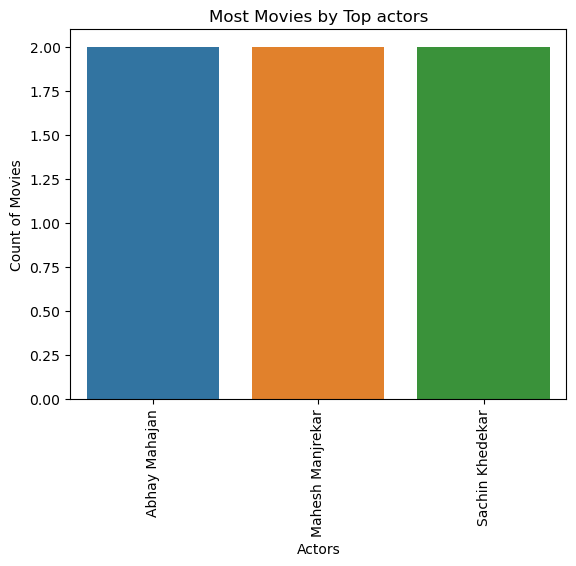

In [69]:
sns.barplot(x=top_10_actor_movie.index,y=top_10_actor_movie.values,order=top_10_actor_movie.index)
plt.xlabel('Actors')
plt.ylabel('Count of Movies')
plt.title('Most Movies by Top actors')
plt.xticks(rotation=90)
plt.show()

In [70]:
top_10_actor_Tv_show=df_un[(df_un['type']=='TV Show')&(df_un['cast']!='unknown cast')].groupby('cast')['title'].count().sort_values(ascending=False).iloc[:10]
top_10_actor_Tv_show

cast
Unknown cast         88
1                     6
Julie Lemieux         5
Karen Suzuki          5
Jay Daye              5
Daniel Fernandes      5
Tracey Erin Smith     5
Flare                 5
Andrew Leung          5
Frank Skinner         5
Name: title, dtype: int64

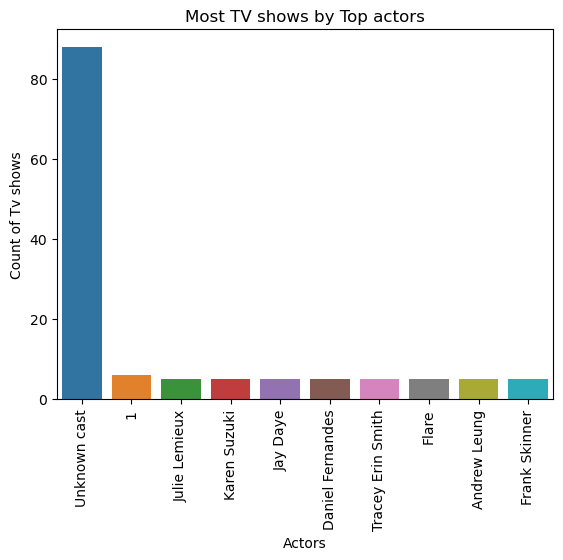

In [71]:
sns.barplot(x=top_10_actor_Tv_show.index,y=top_10_actor_Tv_show.values,order=top_10_actor_Tv_show.index)
plt.xlabel('Actors')
plt.ylabel('Count of Tv shows')
plt.title('Most TV shows by Top actors')
plt.xticks(rotation=90)
plt.show()

#### Top 10 directors who have appeared in most movies

In [72]:
top_10_director_movie=df[(df['type']=='Movie')&(df['director']!='unknown director')].groupby('director')['title'].count().sort_values(ascending=False).iloc[:10]
top_10_director_movie

director
Mark Knight              113
Cannis Holder             61
Moonbug Entertainment     37
Jay Chapman               34
Arthur van Merwijk        30
Manny Rodriguez           22
John English              20
1                         16
Brian Volk-Weiss          15
Baeble Music              14
Name: title, dtype: int64

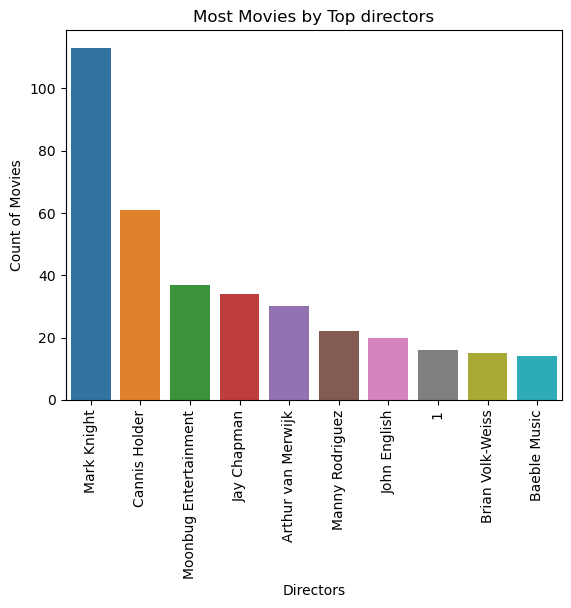

In [73]:
sns.barplot(x=top_10_director_movie.index,y=top_10_director_movie.values,order=top_10_director_movie.index)
plt.xlabel('Directors')
plt.ylabel('Count of Movies')
plt.title('Most Movies by Top directors')
plt.xticks(rotation=90)
plt.show()

#### Top 10 directors who have appeared in most TV shows

In [74]:
top_10_director_Tv_show=df[(df['type']=='TV Show')&(df['director']!='unknown director')].groupby('director')['title'].count().sort_values(ascending=False).iloc[:10]
top_10_director_Tv_show

Series([], Name: title, dtype: int64)

#### Top genre TV shows which are more popular

In [75]:
df_unnested.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
2,s2,Movie,Take Care Good Night,Girish Joshi,"[Mahesh Manjrekar, Abhay Mahajan, Sachin Khe...",India,"March 30, 2021",2018,13+,110 min,Drama,A Metro Family decides to fight a Cyber Crimin...
3,s2,Movie,Take Care Good Night,Girish Joshi,"[Mahesh Manjrekar, Abhay Mahajan, Sachin Khe...",India,"March 30, 2021",2018,13+,110 min,International,A Metro Family decides to fight a Cyber Crimin...
1052,s554,TV Show,The Lucy Show,Unknown director,"[Lucille Ball, Vivian Vance, Gale Gordon, J...",Unknown country,"March 30, 2021",1967,13+,3 Seasons,Comedy,"After her husband's death, Lucy Carmichael, an..."
2020,s1090,TV Show,Scaredy Squirrel,Unknown director,"[Terry McGurrin, Jonathan Gould, Pat McKenna...",Unknown country,"March 30, 2021",2012,TV-G,4 Seasons,Animation,Based on a series of children's books written ...
2021,s1090,TV Show,Scaredy Squirrel,Unknown director,"[Terry McGurrin, Jonathan Gould, Pat McKenna...",Unknown country,"March 30, 2021",2012,TV-G,4 Seasons,Kids,Based on a series of children's books written ...


In [76]:
df_unnested['listed_in']=df_unnested['listed_in'].str.strip()

In [78]:
df_unnested.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
2,s2,Movie,Take Care Good Night,Girish Joshi,"[Mahesh Manjrekar, Abhay Mahajan, Sachin Khe...",India,"March 30, 2021",2018,13+,110 min,Drama,A Metro Family decides to fight a Cyber Crimin...
3,s2,Movie,Take Care Good Night,Girish Joshi,"[Mahesh Manjrekar, Abhay Mahajan, Sachin Khe...",India,"March 30, 2021",2018,13+,110 min,International,A Metro Family decides to fight a Cyber Crimin...
1052,s554,TV Show,The Lucy Show,Unknown director,"[Lucille Ball, Vivian Vance, Gale Gordon, J...",Unknown country,"March 30, 2021",1967,13+,3 Seasons,Comedy,"After her husband's death, Lucy Carmichael, an..."
2020,s1090,TV Show,Scaredy Squirrel,Unknown director,"[Terry McGurrin, Jonathan Gould, Pat McKenna...",Unknown country,"March 30, 2021",2012,TV-G,4 Seasons,Animation,Based on a series of children's books written ...
2021,s1090,TV Show,Scaredy Squirrel,Unknown director,"[Terry McGurrin, Jonathan Gould, Pat McKenna...",Unknown country,"March 30, 2021",2012,TV-G,4 Seasons,Kids,Based on a series of children's books written ...


In [80]:
df_unnested[df_unnested['type']=='TV Show'].groupby('listed_in')['title'].count().sort_values(ascending=False)

listed_in
Kids                      57
Animation                 44
Comedy                    26
Drama                     24
Documentary               20
Special Interest          16
Action                    16
Sports                    12
Unscripted                11
Suspense                  10
International              8
TV Shows                   7
Arts                       5
Entertainment              5
and Culture                5
Romance                    5
Anime                      4
LGBTQ                      3
Talk Show and Variety      3
Faith and Spirituality     3
Science Fiction            3
Adventure                  2
Fantasy                    1
Young Adult Audience       1
Name: title, dtype: int64

In [81]:
top_10_TV_show_genres=df_unnested[df_unnested['type']=='TV Show']['listed_in'].value_counts().iloc[:10]

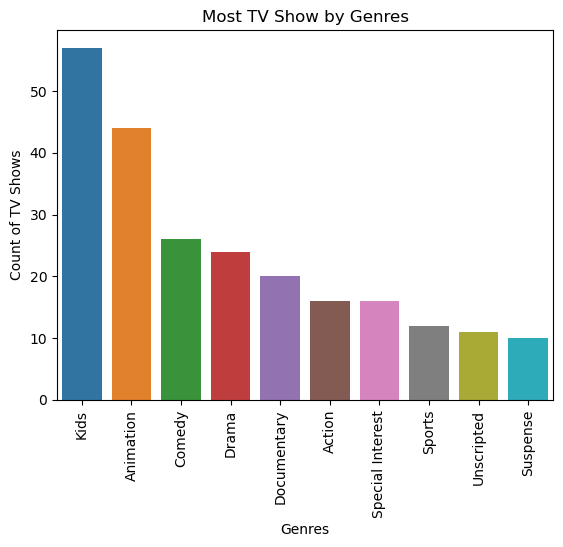

In [84]:
sns.barplot(x=top_10_TV_show_genres.index,y=top_10_TV_show_genres.values,order=top_10_TV_show_genres.index)
plt.xlabel('Genres')
plt.ylabel('Count of TV Shows')
plt.title('Most TV Show by Genres')
plt.xticks(rotation=90)
plt.show()


#### After how many days the movie will be added to Prime after the release of the movie

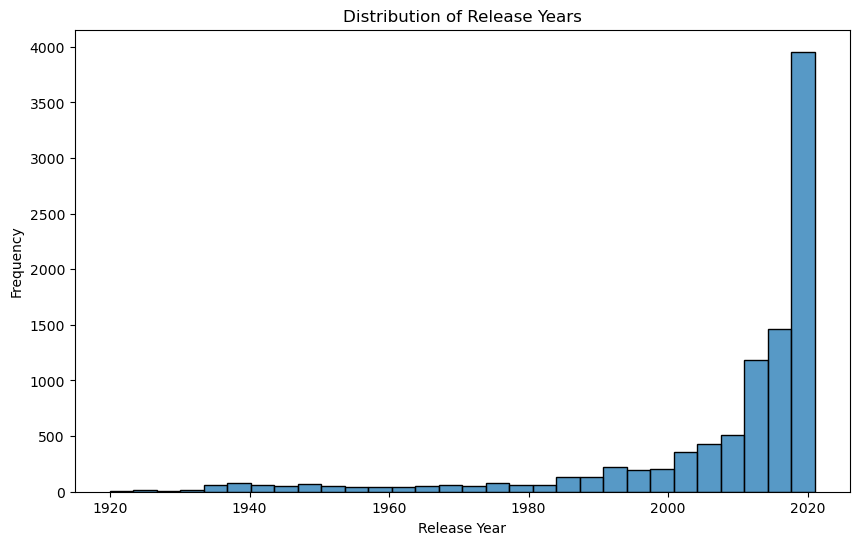

In [85]:
# Plot the distribution of release years
plt.figure(figsize=(10, 6))
plt.title('Distribution of Release Years')
sns.histplot(df['release_year'], bins=30, kde=False)
plt.xlabel('Release Year')
plt.ylabel('Frequency')
plt.show()

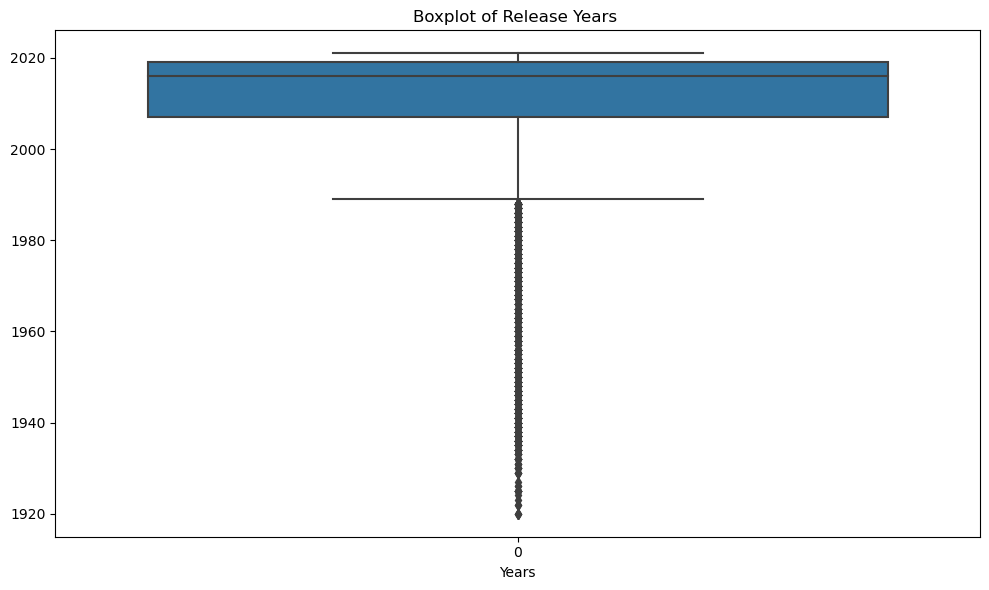

In [86]:
# Plot a boxplot of the days to add movies
plt.figure(figsize=(10, 6))
sns.boxplot(df['release_year'])
plt.title('Boxplot of Release Years ')
plt.xlabel('Years')
plt.tight_layout()
plt.show()

In [87]:
df['release_year']=pd.to_datetime(df['release_year'],format='%Y')
df['days_to_add']=df['date_added']-df['release_year']

In [88]:
df['days_to_add'].mode()

0   238 days
Name: days_to_add, dtype: timedelta64[ns]

#### Insights:
After release it will take approximately 238 days to be added in Amazon Prime for most of the Movies/Tv shows.

### Summarized Recommendations


1.Most content on prime is rated for teenegers which is rated as 13+ with no harmful and violent content.
2.Best Time to release : For TV shows it is in september,june august and for movies it is in march ,april.
3.Popular genres in movies are drama and for TV shows it's Kid and animation.
4.Actors like Abhay Mahajan and Mahesh Manjrekar are popular face in movies. Canadian voice actress Julie lemieux is famous in   TV shows
5.British DJ Mark knight and Cannis Holder produced most of the movies stremed in amazon Prime

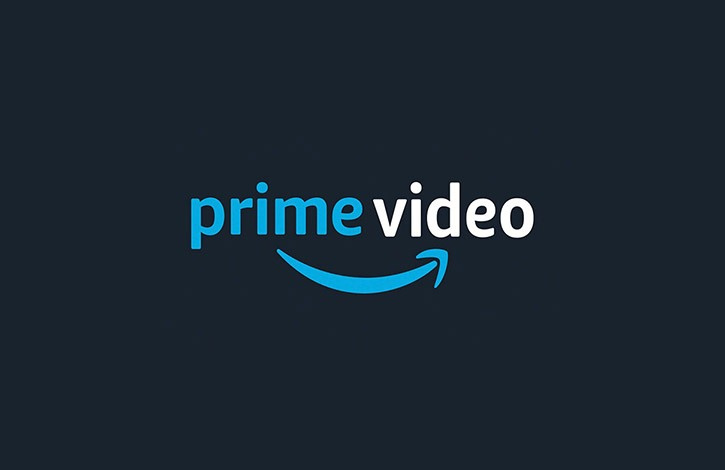